In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Input/pesticide_use.csv", encoding = "cp1252")

/tmp/ipykernel_51741/2370551333.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Input/pesticide_use.csv", encoding = "cp1252")


# Choise of unit = gram per International Dollar

In [3]:
# We are interested to work with this unit. One reason is, this is the only normalized unit of the bunch
# The value_counts() when filtered with this unit, shows just one item for the columns Item and Element.\
# Therefore no other factors
df = df[df["Unit"] == "g/Int$"]

# Continent-wise Descriptive statistics

In [4]:
# We'll do continent-wise analysis
continents_to_filter = ['Africa', 'Asia', 'Europe', 'Northern America', 'Central America', 'South America', 'Oceania']
filtered_df = df[df['Area'].isin(continents_to_filter)]

In [5]:
# We would group by Area, and find the Area's mean Value and sd of the Value
grouped_stats = filtered_df.groupby('Area')['Value'].agg(['mean', 'std'])

In [6]:
grouped_stats["Area"] = grouped_stats.index

In [7]:
grouped_stats

,mean,std,Area
Area,,,
Africa,0.428438,0.063860,Africa
Asia,0.594688,0.065795,Asia
Central America,1.210000,0.181659,Central America
Europe,0.918750,0.049693,Europe
Northern America,1.332812,0.118872,Northern America
Oceania,0.830000,0.186496,Oceania
South America,1.707812,0.613976,South America


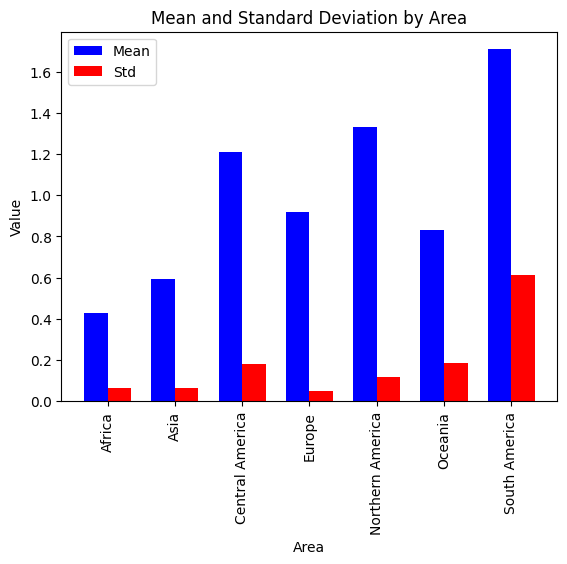

In [8]:
import matplotlib.pyplot as plt
df = grouped_stats

# Plotting grouped bar chart
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = range(len(df))

# Plotting bars for mean
bars1 = ax.bar(x, df['mean'], width=bar_width, label='Mean', color='b')

# Plotting bars for standard deviation
bars2 = ax.bar([p + bar_width for p in x], df['std'], width=bar_width, label='Std', color='r')

# Labeling the x-axis ticks with area names
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(df['Area'], rotation=90)

# Adding labels, title, and legend
ax.set_xlabel('Area')
ax.set_ylabel('Value')
ax.set_title('Mean and Standard Deviation by Area')
ax.legend()

# Show the plot
plt.show()


# Trend analysis of 7 regions (1990-2021)

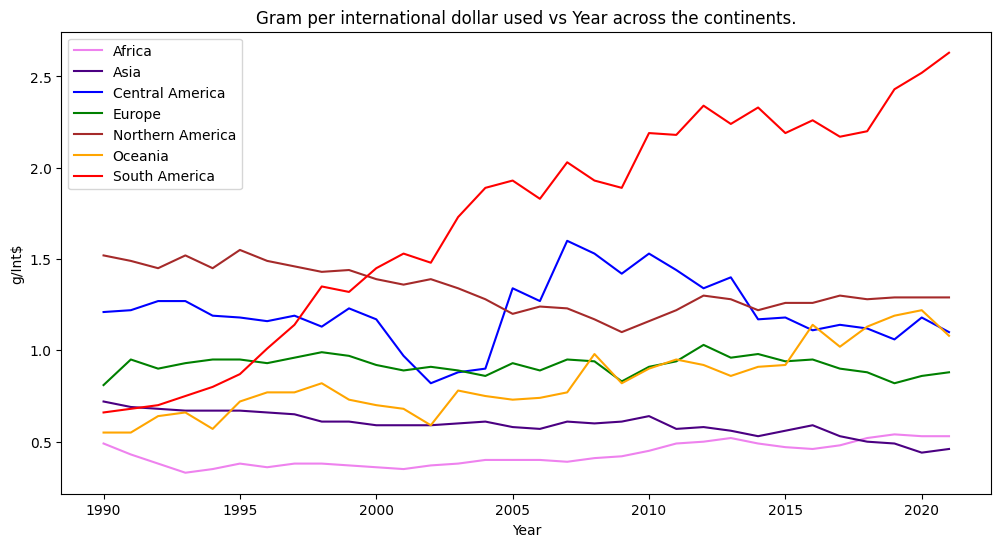

In [9]:
import matplotlib.pyplot as plt
groupedseries = filtered_df.groupby('Area')
listofdfs = [group for _, group in groupedseries]
colors = ['violet','indigo','blue','green','brown','orange','red']
plt.figure(figsize=[12,6])
for i in range(len(listofdfs)):
    temp = listofdfs[i]
    label = temp['Area'].unique()[0]
    plt.plot(
        temp['Year'],
        temp['Value'],
        marker = None,
        linestyle = '-',
        color = colors[i],
        label =label
    )
plt.xlabel('Year')
plt.ylabel('g/Int$')
plt.title('Gram per international dollar used vs Year across the continents.')
plt.legend()
plt.show()

# Method 1: Exploring the time-series

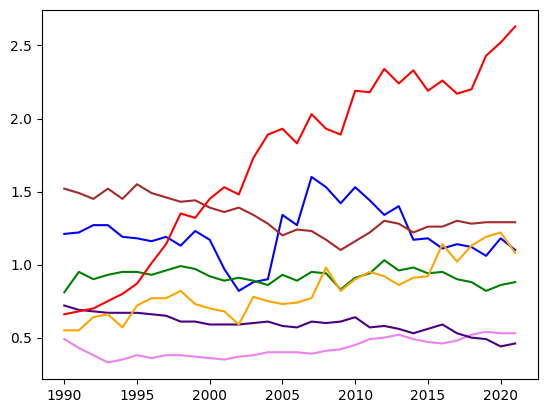

In [10]:
for i in range(len(listofdfs)):
    temp = listofdfs[i]
    label = temp["Area"].unique()[0]
    plt.plot(
        temp['Year'],
        temp['Value'],
        marker = None,
        linestyle = '-',
        color = colors[i],
        label =label
    )

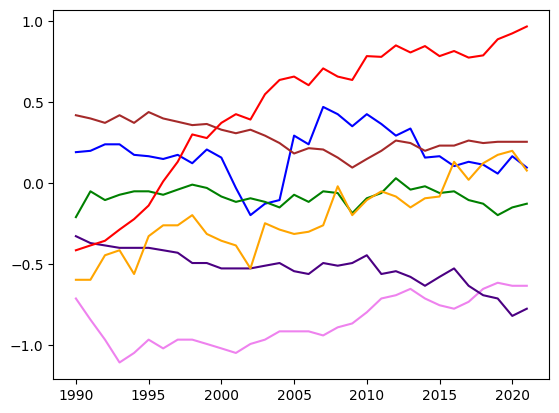

In [11]:
import numpy as np
for i in range(len(listofdfs)):
    temp = listofdfs[i]
    label = temp["Area"].unique()[0]
    temp['Value'] = np.log(temp['Value'])
    plt.plot(
        temp['Year'],
        temp['Value'],
        marker = None,
        linestyle = '-',
        color = colors[i],
        label =label
    )

In [12]:
# When the time series is harder to judge just by looking at the plot, we should move
# on to the next step

# Method 2: ACF plot and PACF plot

p-value: 0.06040508679091213


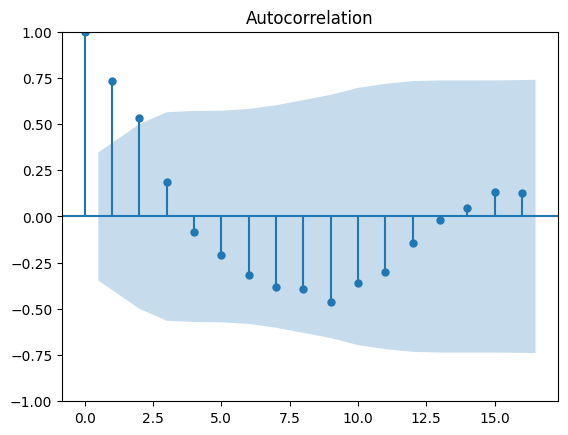

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
temp = listofdfs[2]
acf_original = plot_acf(temp["Value"])
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(temp["Value"])
print(f'p-value: {adf_test[1]}')

# Method 3: ADF test

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(temp["Value"])
print(f'p-value: {adf_test[1]}')

p-value: 0.06040508679091213


# Transform to stationary: differencing

In [15]:
temp["Value"] = temp["Value"].diff().dropna()
temp["Value"] = temp["Value"].dropna()

In [16]:
temp = temp.iloc[1:]
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(temp["Value"])
print(f'p-value: {adf_test[1]}')

p-value: 2.6291566281205717e-07


In [17]:
temp["Value"]

101958    0.008230
101959    0.040166
101960    0.000000
101961   -0.065064
101962   -0.008439
101963   -0.017094
101964    0.025533
101965   -0.051736
101966    0.084797
101967   -0.050010
101968   -0.187463
101969   -0.167992
101970    0.070618
101971    0.022473
101972    0.398030
101973   -0.053653
101974    0.230987
101975   -0.044736
101976   -0.074611
101977    0.074611
101978   -0.060625
101979   -0.071973
101980    0.043803
101981   -0.179468
101982    0.008511
101983   -0.061154
101984    0.026668
101985   -0.017700
101986   -0.055060
101987    0.107246
101988   -0.070204
Name: Value, dtype: float64

In [18]:
# resource for understanding acf and pacf: https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf

In [19]:
# Step 1: Check for stationarity of time series
#  Method 1: Time series plot
#  Method 2: ACF plot and PACF plot
#  Method 3: ADF test
# Step 2: Determine ARIMA model params p and q
# Step 3: Fit the ARIMA model
# Step 4: Make time series predictions
# (Optional): Auto-fit ARIMA model
# Step 5: Evaluate model predictions

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sun, 11 Aug 2024   AIC                            408.969
Time:                        23:34:51   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

/tmp/ipykernel_51741/722257608.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/tmp/ipykernel_51741/722257608.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


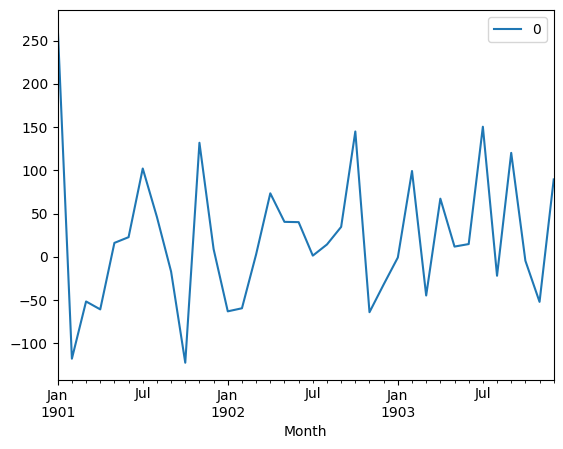

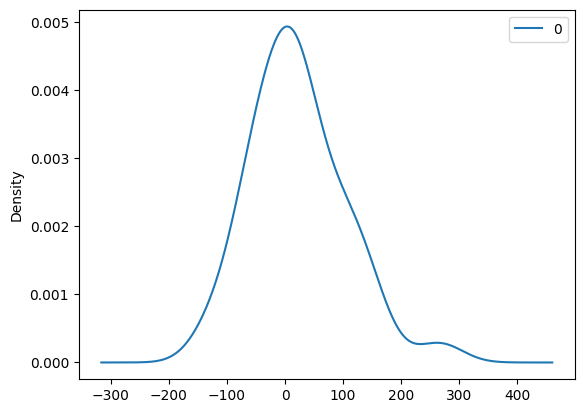

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [20]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# Step 0: exploring the dataset

In [21]:
df = pd.read_csv("./Input/pesticide_use.csv", encoding = "cp1252")
df = df[df["Unit"] == "g/Int$"]
continents_to_filter = ['Africa', 'Asia', 'Europe', 'Northern America', 'Central America', 'South America', 'Oceania']
df = df[df['Area'].isin(continents_to_filter)]

/tmp/ipykernel_51741/3554862881.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Input/pesticide_use.csv", encoding = "cp1252")


In [22]:
df["Logvalue"] = np.log(df["Value"])

In [23]:
groupedseries = df.groupby('Area')
listofdfs = [group for _, group in groupedseries]

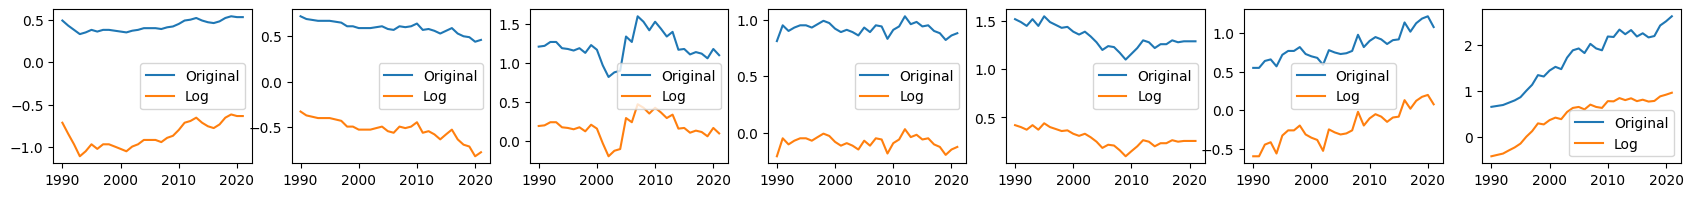

In [24]:
fig, axs = plt.subplots(1, len(listofdfs), figsize=(21,2))
for i in range(len(listofdfs)):
    temp = listofdfs[i]
    label = temp['Area'].unique()[0]
    axs[i].plot(temp['Year'], temp['Value'], label = "Original")
    axs[i].plot(temp['Year'], temp['Logvalue'], label = "Log")
    axs[i].legend()

In [25]:
# by looking at the top figure
# from left to right: africa, asia, central america, europe, northern america, oceania, and south america
# low variance:       orgn    orgn  log              ?       ?                 ?            ?

In [26]:
orgn_stats = df.groupby('Area')['Value'].agg(['mean', 'std'])
log_stats = df.groupby('Area')['Logvalue'].agg(['mean', 'std'])

In [27]:
orgn_stats

,mean,std
Area,,
Africa,0.428438,0.063860
Asia,0.594688,0.065795
Central America,1.210000,0.181659
Europe,0.918750,0.049693
Northern America,1.332812,0.118872
Oceania,0.830000,0.186496
South America,1.707812,0.613976


In [28]:
log_stats

,mean,std
Area,,
Africa,-0.858206,0.147364
Asia,-0.525938,0.114825
Central America,0.179390,0.153822
Europe,-0.086179,0.054710
Northern America,0.283444,0.089121
Oceania,-0.210365,0.222423
South America,0.454863,0.435082


In [29]:
# by looking at the stats
# from left to right: africa, asia, central america, europe,  northern america, oceania, and south america
# low variance:       orgn    orgn  ? = log          ? = orgn ? = log           ? = orgn     ? = log

In [30]:
choosinglogvalue = [0, 0, 1, 0, 1, 0, 1]

# Step 1: check for stationarity of time-series

## Method 1: time series plot

In [31]:
traindfs = []
testdfs = []
for i in range(len(listofdfs)):
    traindfs.append(listofdfs[i].head(len(listofdfs[i])-1))
    testdfs.append(listofdfs[i].tail(1))

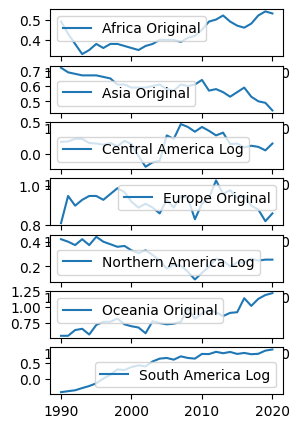

In [32]:
fig, axs = plt.subplots(len(listofdfs),1, figsize=(3,5))
for i in range(len(listofdfs)):
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    if choosinglogvalue[i] == 0:
        axs[i].plot(temp['Year'], temp['Value'], label = label +" "+ "Original")
    else:
        axs[i].plot(temp['Year'], temp['Logvalue'], label = label +" "+ "Log")
    

    axs[i].legend()

# Method 2: ACF plot and PACF plot

In [33]:
# These two plots are helpful throughout the process of fitting ARIMA models

In [34]:
# resource: https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf
# An ACF plot provides answers to the following questions.
#  1. Is this time series white noise or random?
#  2. Is an observation related to an adjacent observation, or an observation twice removed?
#  3. Can the observed time series be modeled with an MA model? If yes, what is the order?

In [35]:
# Q: What is the difference between PACF and ACF
# A: ACF takes into account the direct + the indirect correlation between the value of two time points while
# the PACF only takes into consideration the direct correlation
# reource: https://www.youtube.com/watch?v=DeORzP0go5I&t=79s
# In this reource this is explained with predicting the price of salmon in the month of March
# If I use the price of salmon in January to predict it then the ACF will take into account
# both January -> February -> March
# and January -> March
# The PACF will only take into account the effect of the price of salmon in January to predict
# the price of salmon in March

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

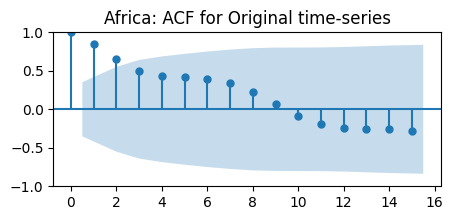

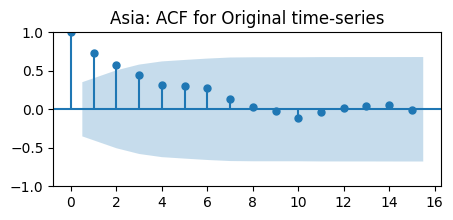

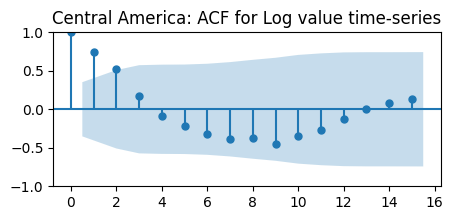

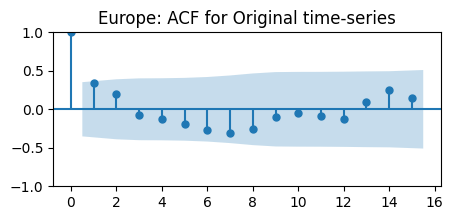

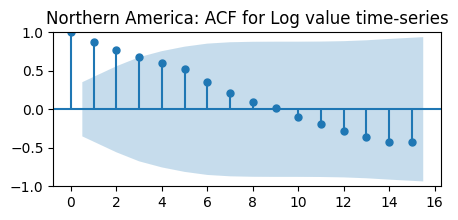

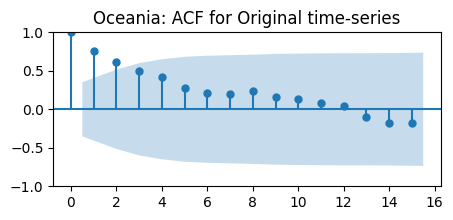

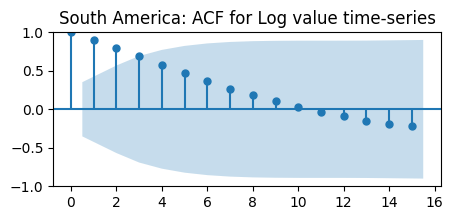

In [37]:
for i in range(len(traindfs)):
    fig, ax = plt.subplots(figsize=(5,2)) 
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    if choosinglogvalue[i] == 0:
        plot_acf(temp["Value"], ax=ax, title=label+": "+ "ACF for Original time-series")
    else:
        plot_acf(temp["Logvalue"], ax=ax, title=label+": "+ "ACF for Log value time-series")

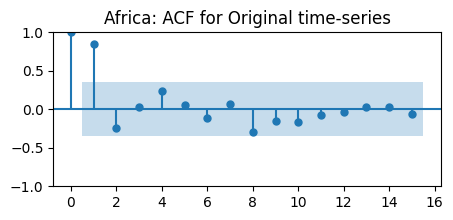

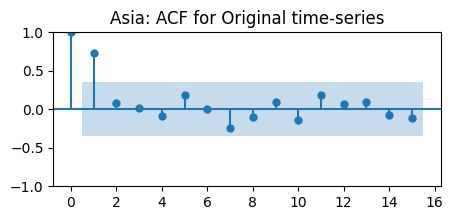

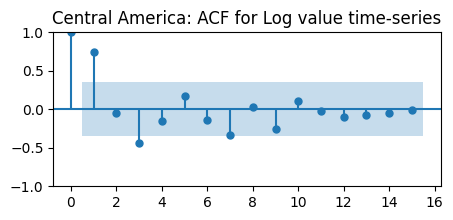

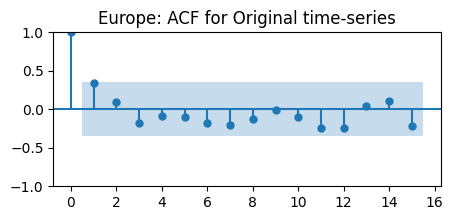

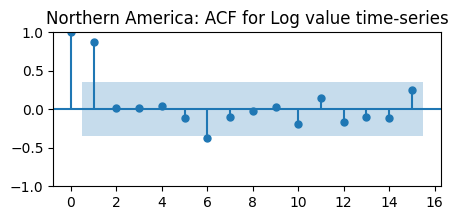

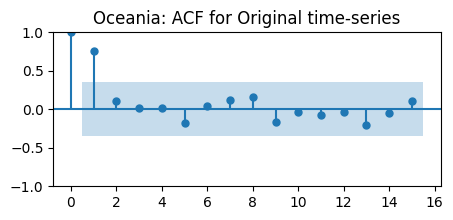

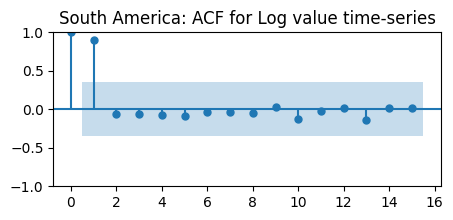

In [38]:
for i in range(len(traindfs)):
    fig, ax = plt.subplots(figsize=(5,2)) 
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    if choosinglogvalue[i] == 0:
        plot_pacf(temp["Value"], ax=ax, title=label+": "+ "ACF for Original time-series")
    else:
        plot_pacf(temp["Logvalue"], ax=ax, title=label+": "+ "ACF for Log value time-series")

# Method 3: ADF test

In [39]:
# The null hypothesis in the ADF test is: the time series is non-stationary
# If p < 0.5 we reject the null == the time series is non-stationary
# Let us see if we reject the null for all the seven time-series

In [40]:
from statsmodels.tsa.stattools import adfuller
for i in range(len(traindfs)): 
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    if choosinglogvalue[i] == 0:
        adf_test = adfuller(temp["Value"])
        print("p-value = "+str(adf_test[1]) + " for "+label)
    else:
        adf_test = adfuller(temp["Logvalue"])
        print("p-value = "+str(adf_test[1])+ " for "+label)

p-value = 0.22387709578732895 for Africa
p-value = 0.8808034257898254 for Asia
p-value = 0.06020235570251501 for Central America
p-value = 0.0016448342414842848 for Europe
p-value = 0.461304357836533 for Northern America
p-value = 0.9977472938234591 for Oceania
p-value = 0.00031058548751200033 for South America


In [41]:
# if p-value < 0.5 continue with modeling
continuewithmodeling = [0, 0, 0, 1, 0, 0, 1]

In [42]:
tss = []
for i in range(len(traindfs)): 
    temp = traindfs[i]
    if choosinglogvalue[i] == 0:
        tss.append(temp["Value"])
    else:
        tss.append(temp["Logvalue"])

In [43]:
# after three diff operations, all the time series become stationary
for i in range(len(traindfs)):
    adf_test = adfuller(tss[i])
    p  = adf_test[1]
    diff = tss[i].diff().dropna()
    adf_test = adfuller(diff)
    p  = adf_test[1]
    diff = diff.diff().dropna()
    adf_test = adfuller(diff)
    p  = adf_test[1] 
#     while(p >= 0.05):
#         diff = tss[i].diff().dropna()
#         adf_test = adfuller(tss[i])
#         p = adf_test[1]
#         print(p)
    print("p-value = "+str(adf_test[1]))

p-value = 1.656901873452554e-05
p-value = 9.207374305210468e-05
p-value = 2.1284546626051223e-20
p-value = 0.00010322857333002919
p-value = 1.5590846717106803e-06
p-value = 0.005409825603063041
p-value = 7.665762904433547e-05


In [44]:
initialtimeseries = []
areas = []
for i in range(len(traindfs)): 
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    areas.append(label)
    if choosinglogvalue[i] == 0:
        initialtimeseries.append(temp["Value"])
    else:
        initialtimeseries.append(temp["Logvalue"])

In [45]:
continuewithmodeling = []
for i in range(len(initialtimeseries)):
    label = areas[i]
    adf_test = adfuller(initialtimeseries[i])
    p = adf_test[1]
    if p < 0.05:
        continuewithmodeling.append(1)
        continue
    else:
        continuewithmodeling.append(0)

In [46]:
newtimeseries = []
countdiffs = []
for i in range(len(continuewithmodeling)):
    value = continuewithmodeling[i]
    if value == 0:
        counter = 1
        diff = initialtimeseries[i]
        diff = diff.diff().dropna()
        adf_test = adfuller(diff)
        p = adf_test[1]
        while p >= 0.05:
            diff = diff.diff().dropna()
            adf_test = adfuller(diff)
            p = adf_test[1]
            counter += 1
        newtimeseries.append(diff)
        countdiffs.append(counter)
    else:
        newtimeseries.append(initialtimeseries[i])
        countdiffs.append(0)
        

In [47]:
for i in range(len(newtimeseries)):
    adf_test = adfuller(newtimeseries[i])
    #p = adf_test[1]
    print("p-value = "+str(adf_test[1]))

p-value = 1.656901873452554e-05
p-value = 9.207374305210468e-05
p-value = 9.881021329063121e-07
p-value = 0.0016448342414842848
p-value = 1.1548629484560612e-06
p-value = 3.524414847665648e-13
p-value = 0.00031058548751200033


In [48]:
# plotting the new time series

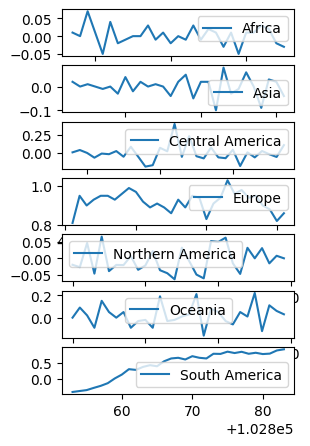

In [49]:
fig, axs = plt.subplots(len(listofdfs),1, figsize=(3,5))
for i in range(len(listofdfs)):
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    axs[i].plot(newtimeseries[i], label = label)
    axs[i].legend()

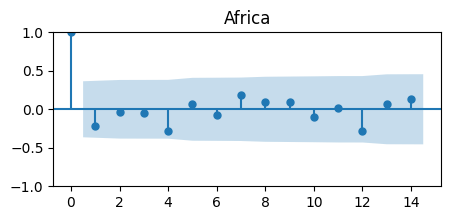

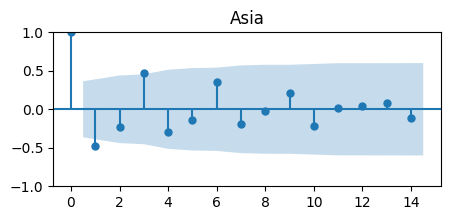

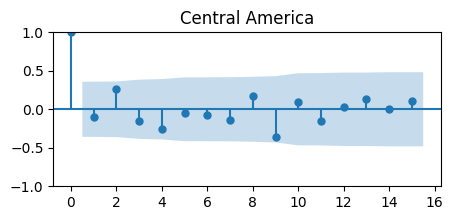

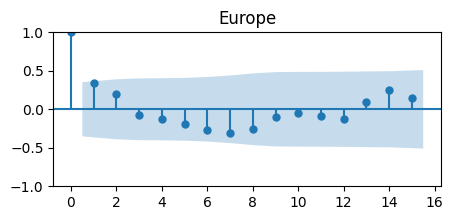

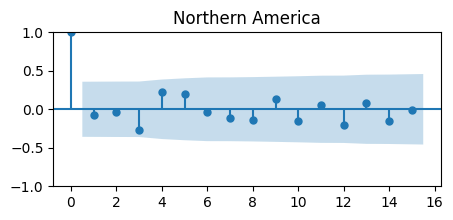

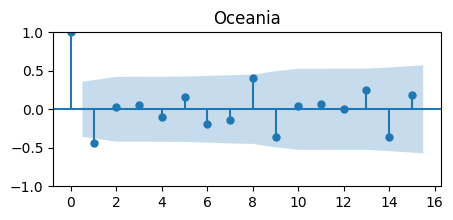

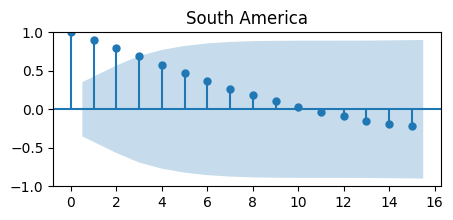

In [50]:
# the acf values drops really quickly, meaning the time series is less correlated with its lag
for i in range(len(traindfs)):
    fig, ax = plt.subplots(figsize=(5,2)) 
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    plot_acf(newtimeseries[i], ax=ax, title=label)

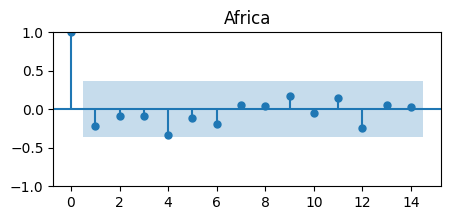

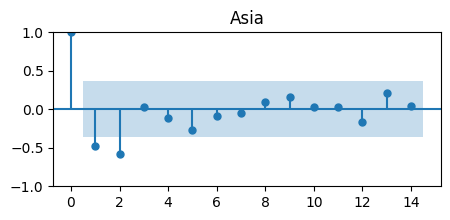

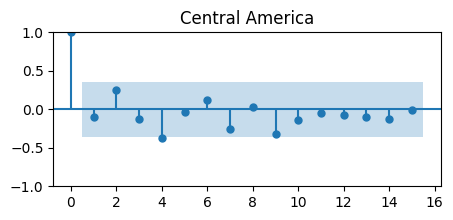

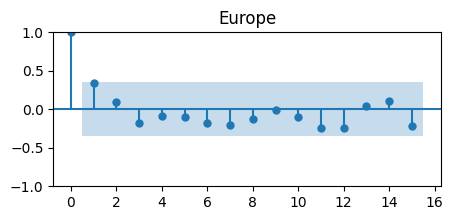

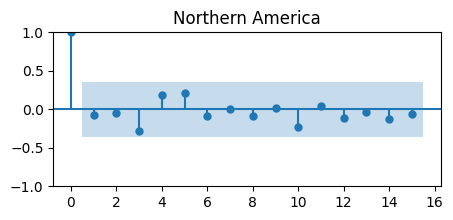

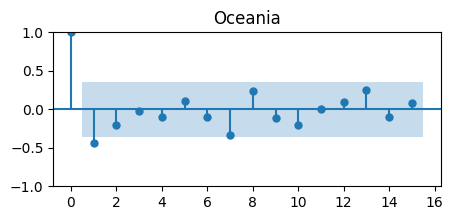

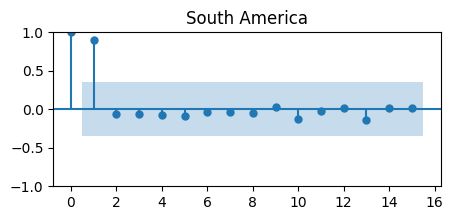

In [51]:
# the pacf values also shows less strong spike at lag 1
for i in range(len(traindfs)):
    fig, ax = plt.subplots(figsize=(5,2)) 
    temp = traindfs[i]
    label = temp['Area'].unique()[0]
    plot_pacf(newtimeseries[i], ax=ax, title=label)

In [52]:
# calculate the d value for the arima model
countdiffs

[2, 2, 1, 0, 1, 1, 0]

# Determine the p and q values for the arima model

In [53]:
# we'll use the acf and the pacf plots to determine the p and q values
# for each continent, we'll use the 0 diff 1 diff or 2 diff times series based on the countdiffs list

In [54]:
# rule of thumb
# If the PACF plot has a significant spike at lag p and not beyond AND the ACF plot decays more gradually, this
# may suggest an arima(p,d,0) model
# If the ACF plot has a significant spike at lag q and not beyond AND the PACF plot decays more gradually, this
# may suggest and arima(0,d,q) model

In [55]:
# the values of p in arima p,d,q
# Africa = 0, asia =0, central america = 0, europe = 0,northern america = 0, oceania = 0, south america = 1
# the values of q in arima p,d,q
# Africa = 0, asia =0, central america = 0, europe = 0,northern america = 0, oceania = 0, south america = 1

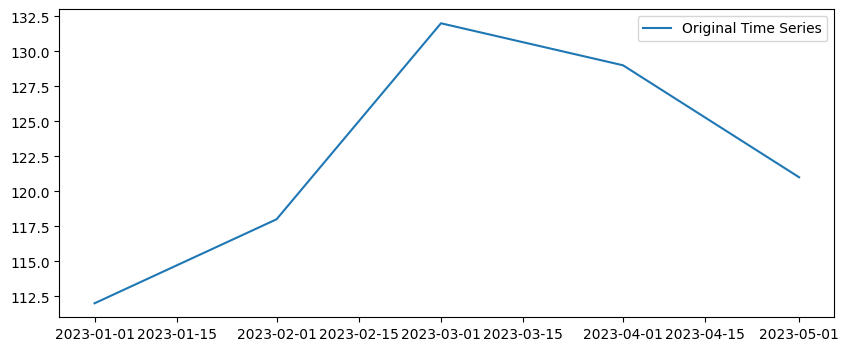

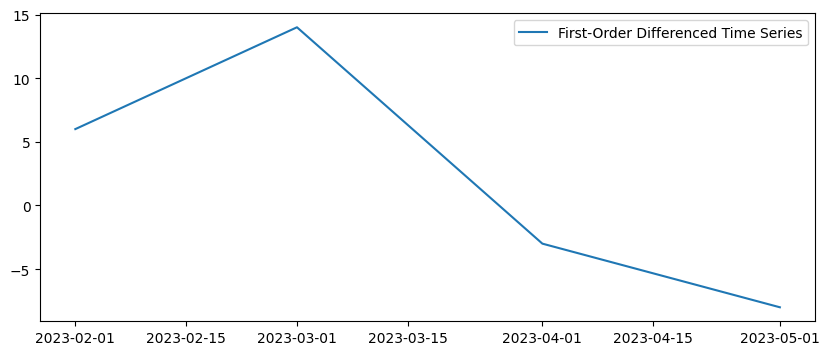

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample time series data
data = {'Month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05'],
        'Value': [112, 118, 132, 129, 121]}
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(df, label='Original Time Series')
plt.legend(loc='best')
plt.show()

# First-order differencing
df_diff = df.diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 4))
plt.plot(df_diff, label='First-Order Differenced Time Series')
plt.legend(loc='best')
plt.show()


In [57]:
# look at the first slide of the downloaded slides
# In the acf chart there are a few significant spikes at the beginning, but it decreases to zero line in the middle, in the pacf chart you see only one or two spikes you use the ar model. The order in the ar(k) model depends on the number significant spikes in the pacf plot. In the above plot, for the first reason we will use n ar(k) model. the value of k = 1, since there is only one significant spike in the PACF plot.

In [58]:
# If the partial autocorrelation is significant at lag k and not sigbificant at any higher order lags
# i.e., PACF cuts off at lag k, then it suggests that you should try fitting an autoregressive model
# of order k.

In [69]:
newtimeseries[6]

102853   -0.415515
102854   -0.385662
102855   -0.356675
102856   -0.287682
102857   -0.223144
102858   -0.139262
102859    0.009950
102860    0.131028
102861    0.300105
102862    0.277632
102863    0.371564
102864    0.425268
102865    0.392042
102866    0.548121
102867    0.636577
102868    0.657520
102869    0.604316
102870    0.708036
102871    0.657520
102872    0.636577
102873    0.783902
102874    0.779325
102875    0.850151
102876    0.806476
102877    0.845868
102878    0.783902
102879    0.815365
102880    0.774727
102881    0.788457
102882    0.887891
102883    0.924259
Name: Logvalue, dtype: float64

In [73]:
for i in range(len(newtimeseries)):
    timeseries = newtimeseries[i]
    data = {"y":timeseries}
    temp = pd.DataFrame(data)
    temp.to_csv(areas[i]+".csv")

In [1]:
# africa arma(0,0)
# asia arma(2,3) or ma(3)
# central america ar(4)
# europe arma(0,0)
# northern america arma(0,0)
# oceanina arma(1,1)
# south america ar(1)